In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread

from bone_xray.classifier import Densenet121ClassificationPredictor
from bone_xray.localization import Densenet121LocalizationPredictor, visualize_heatmap

In [2]:
classifier = Densenet121ClassificationPredictor()
visualizer = Densenet121LocalizationPredictor()

In [3]:
img_path = "image path"
img = imread(img_path)
if img.ndim == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Classification

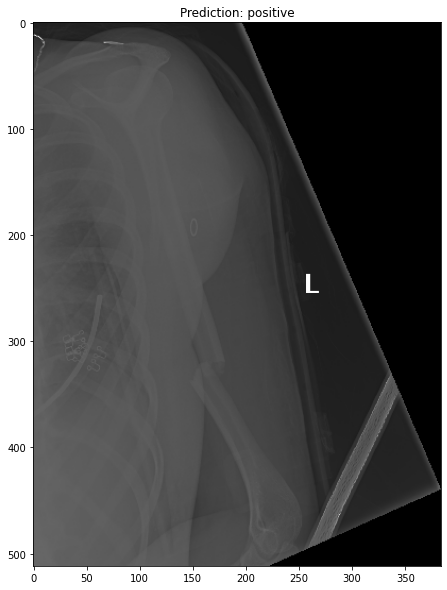

In [4]:
probability = classifier(img)
prediction = "positive" if probability > 0.5 else "negative"

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.show()

# Localization

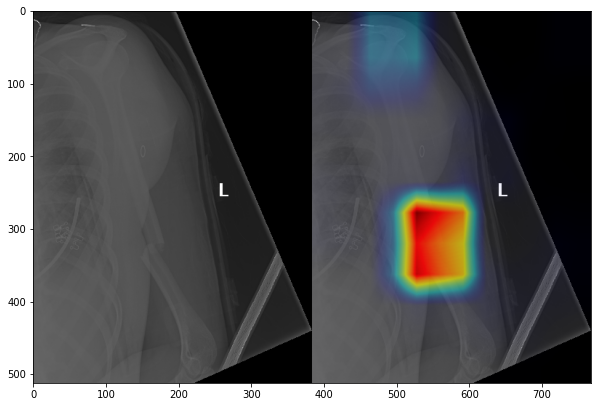

In [5]:
cam = visualizer(img)
visual = visualize_heatmap(img, cam)
visual = np.hstack([img, visual])

plt.figure(figsize=(10, 10))
plt.imshow(visual)
plt.show()